In [1]:
from predictor_new import DraftBasedPredictor
import joblib

Total features: 60
Training features shape: (964, 60)
Features used in training:
- pick1_encoded
- pick2_encoded
- pick3_encoded
- pick4_encoded
- pick5_encoded
- winrate_pick1
- winrate_pick2
- winrate_pick3
- winrate_pick4
- winrate_pick5
- count_pick1
- count_pick2
- count_pick3
- count_pick4
- count_pick5
- kills
- deaths
- assists
- team kpm
- ckpm
- gspd
- gpr
- gamelength
- firstblood
- firstdragon
- dragons
- elementaldrakes
- firstherald
- heralds
- firstbaron
- barons
- firsttower
- firstmidtower
- firsttothreetowers
- turretplates
- earned gpm
- goldat15
- goldat20
- goldat25
- golddiffat15
- golddiffat20
- golddiffat25
- xpdiffat20
- xpdiffat25
- wardsplaced
- visionscore
- wardskilled
- controlwardsbought
- cspm
- minionkills
- monsterkills
- csat15
- csdiffat15
- csat20
- csdiffat20
- csat25
- csdiffat25
- damagetochampions
- damagetakenperminute
- damagemitigatedperminute
=== Initial Model Evaluation ===

Training XGBoost...
XGBoost Accuracy: 0.9793

Classification Repor

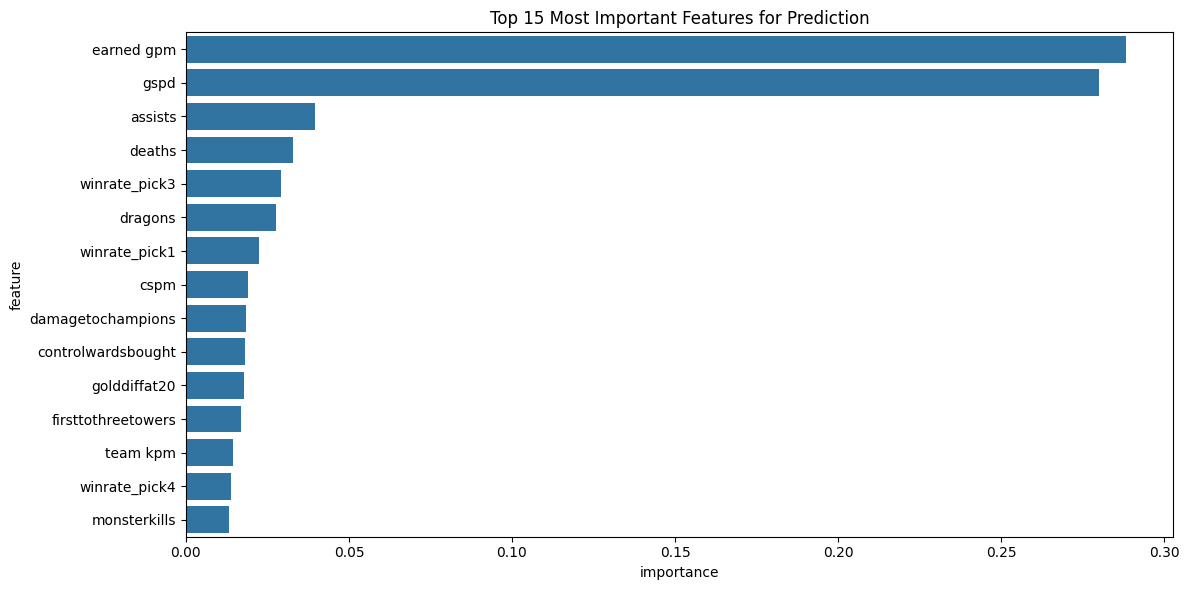

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.9, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [4]:
predictor = DraftBasedPredictor("../Data/processed_for_prediction.csv")
predictor.train_model()


In [2]:
predictor = joblib.load('../Models/draft_predictor_best_model.joblib')

In [3]:
#Example
result = predictor.predict_match(
    team1_name="T1",
    team1_picks=["Twisted Fate", "Tahm Kench", "Senna", "Lee Sin", "Ahri"],
    team2_name="Gen.G",
    team2_picks=["Lucian", "Nami", "K'Sante", "Sejuani", "Tristana"]
)
    
predictor.print_detailed_prediction(result)


Predicting match: T1 vs Gen.G
Model expects 60 features

Processing features for prediction:

Processing features for prediction:


c:\Users\NguyễnHoàngDuy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\NguyễnHoàngDuy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



=== Match Prediction ===

Overall Win Probabilities:
T1: 0.3%
Gen.G: 99.7%

=== Champion Statistics ===

T1 Draft:

Position 1 - Twisted Fate:
  Team Stats (Pick 1) : 0.0% win rate (2 games)
  Team Stats (All Picks)     : 54.5% win rate (11 games)
  Overall Stats (Pick 1) : 0.0% win rate (2 games)
  Overall Stats (All Picks)   : 64.9% win rate (37 games)

Position 2 - Tahm Kench:
  Team Stats (Pick 2) : 100.0% win rate (2 games)
  Team Stats (All Picks)     : 100.0% win rate (8 games)
  Overall Stats (Pick 2) : 66.7% win rate (12 games)
  Overall Stats (All Picks)   : 61.5% win rate (39 games)

Position 3 - Senna:
  Team Stats (Pick 3) : 100.0% win rate (1 games)
  Team Stats (All Picks)     : 77.3% win rate (22 games)
  Overall Stats (Pick 3) : 100.0% win rate (1 games)
  Overall Stats (All Picks)   : 67.0% win rate (88 games)

Position 4 - Lee Sin:
  Team Stats (Pick 4) : 100.0% win rate (1 games)
  Team Stats (All Picks)     : 20.0% win rate (10 games)
  Overall Stats (Pick 4) : 50

In [10]:
#Save model
joblib.dump(predictor, '../Models/draft_predictor_best_model.joblib')
print("Model saved successfully!")


Model saved successfully!
